# CREDIT RISK MODEL

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import inspect
import time
import calendar

## Data Preprocessing

In [2]:
df = pd.read_csv("Data\loan.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_42920\798392170.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv("Data\loan.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_42920\798392170.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data\loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [4]:
df.drop(columns=['id', 'member_id', 'url', 'desc', 'title', 'zip_code'], inplace=True)

In [5]:
df.isnull().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 68, dtype: int64

In [6]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_values': missing, 'percentage': missing_percent})
missing_df = missing_df[missing_df.missing_values > 0].sort_values(by='percentage', ascending=False)
print("\nValores perdidos:")
print(missing_df)


Valores perdidos:
                             missing_values  percentage
dti_joint                            886870   99.942640
annual_inc_joint                     886868   99.942415
verification_status_joint            886868   99.942415
il_util                              868762   97.902024
mths_since_rcnt_il                   866569   97.654892
max_bal_bc                           866007   97.591559
total_cu_tl                          866007   97.591559
total_bal_il                         866007   97.591559
open_il_12m                          866007   97.591559
open_il_24m                          866007   97.591559
open_il_6m                           866007   97.591559
open_acc_6m                          866007   97.591559
all_util                             866007   97.591559
inq_last_12m                         866007   97.591559
open_rv_12m                          866007   97.591559
inq_fi                               866007   97.591559
open_rv_24m                  

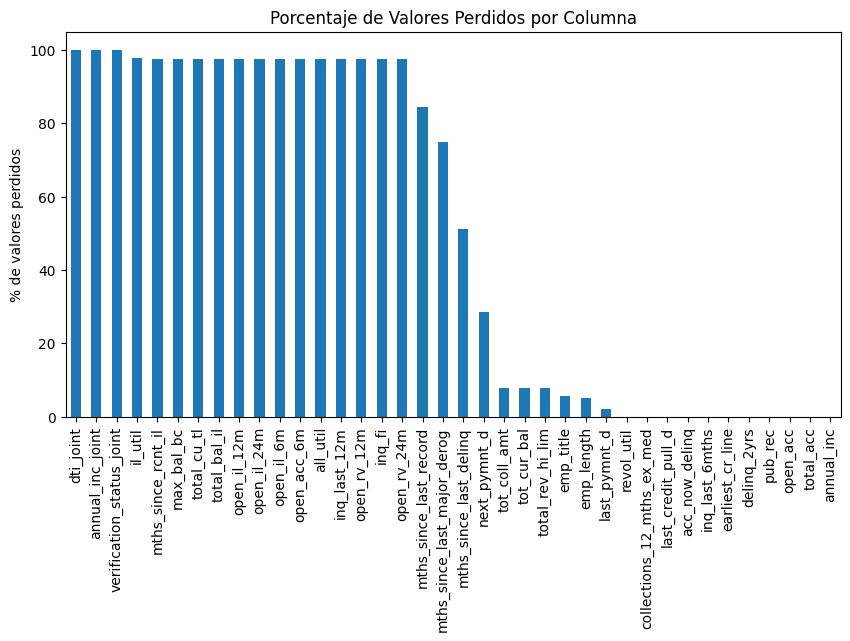

In [7]:
missing_df.percentage.plot(kind='bar', figsize=(10,5), title='Porcentaje de Valores Perdidos por Columna')
plt.ylabel('% de valores perdidos')
plt.show()


Distribución de la variable objetivo:
loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


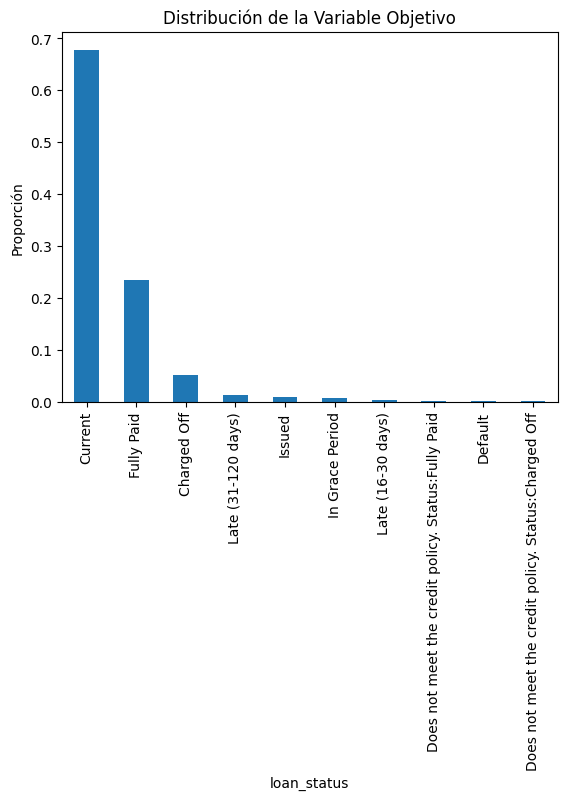

In [8]:
print("\nDistribución de la variable objetivo:")
print(df['loan_status'].value_counts())
df['loan_status'].value_counts(normalize=True).plot(kind='bar', title='Distribución de la Variable Objetivo')
plt.ylabel('Proporción')
plt.show()

In [9]:
missing_threshold = 0.8
missing_percent = df.isnull().sum() / len(df)
cols_to_drop = missing_percent[missing_percent > missing_threshold].index

# Drop columns
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns due to high missing values (>80% missing):", list(cols_to_drop))
print("New dataset shape:", df.shape)

Dropped columns due to high missing values (>80% missing): ['mths_since_last_record', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
New dataset shape: (887379, 50)


#### Conversion de la variable target

In [10]:
df['loan_status_binary'] = df['loan_status'].apply(lambda x: 1 if x == 'Default' else 0)

## EDA

In [11]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status_binary']


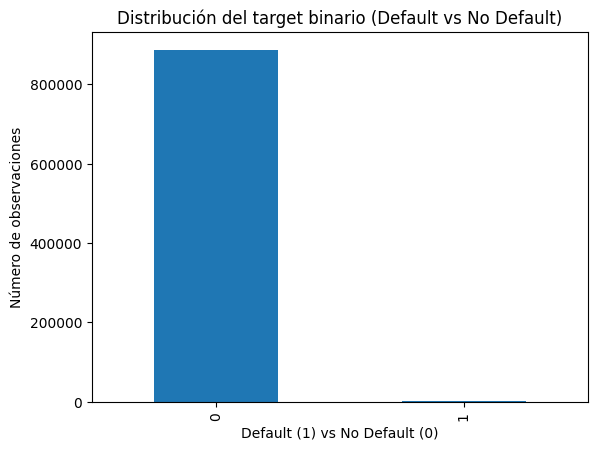

In [12]:
df['loan_status_binary'].value_counts().plot(kind='bar', title='Distribución del target binario (Default vs No Default)')
plt.xlabel('Default (1) vs No Default (0)')
plt.ylabel('Número de observaciones')
plt.show()


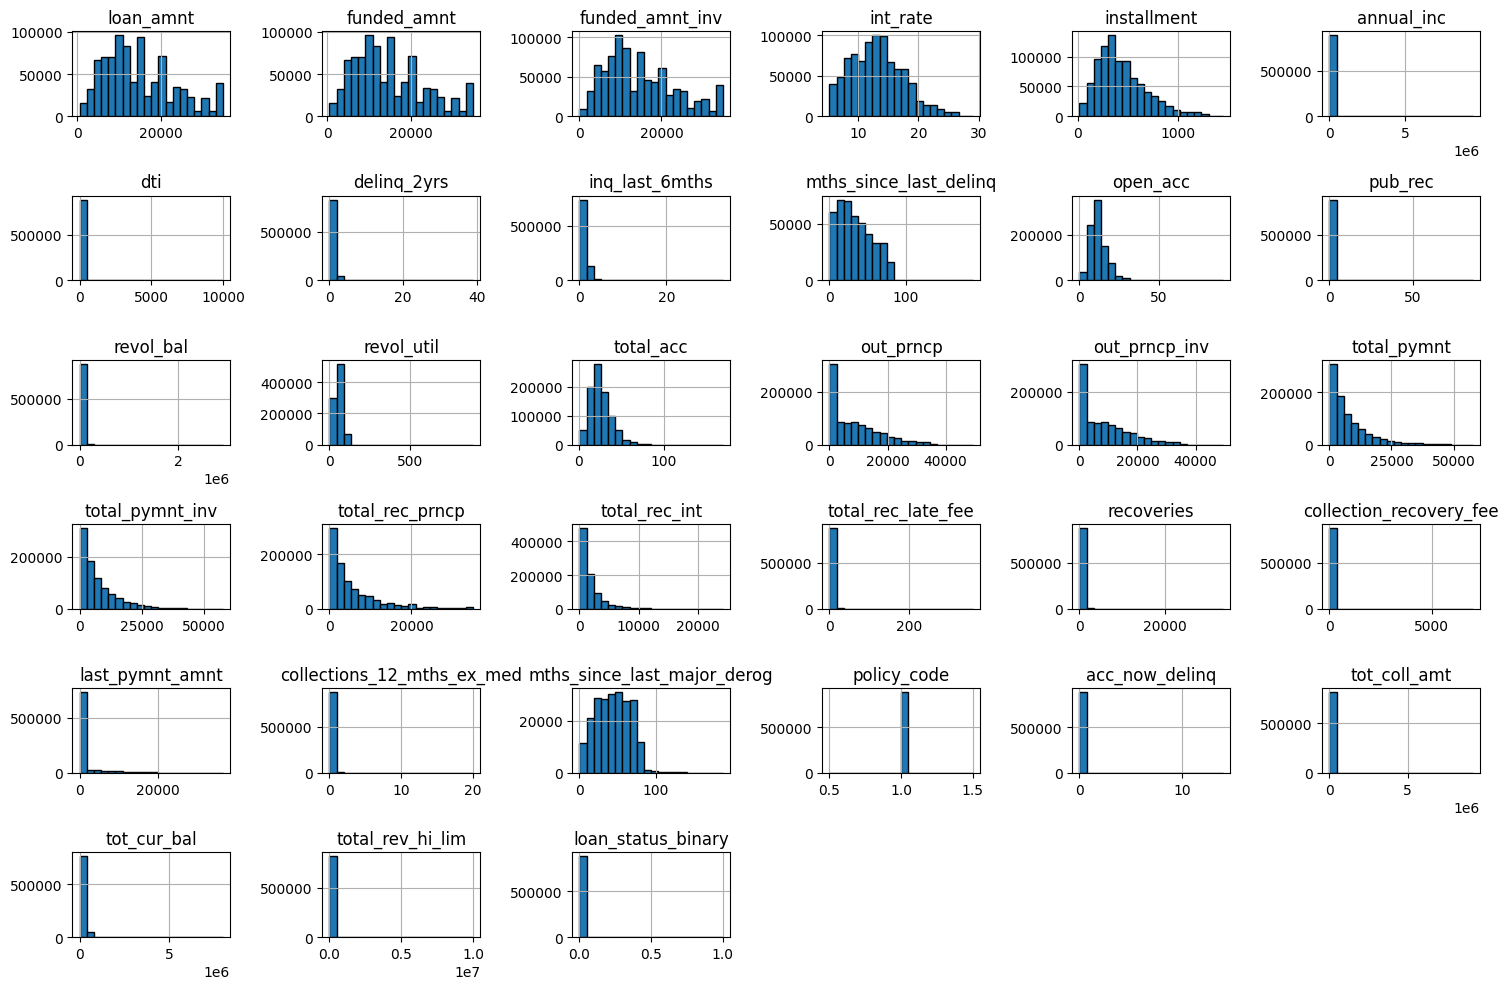

In [13]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()


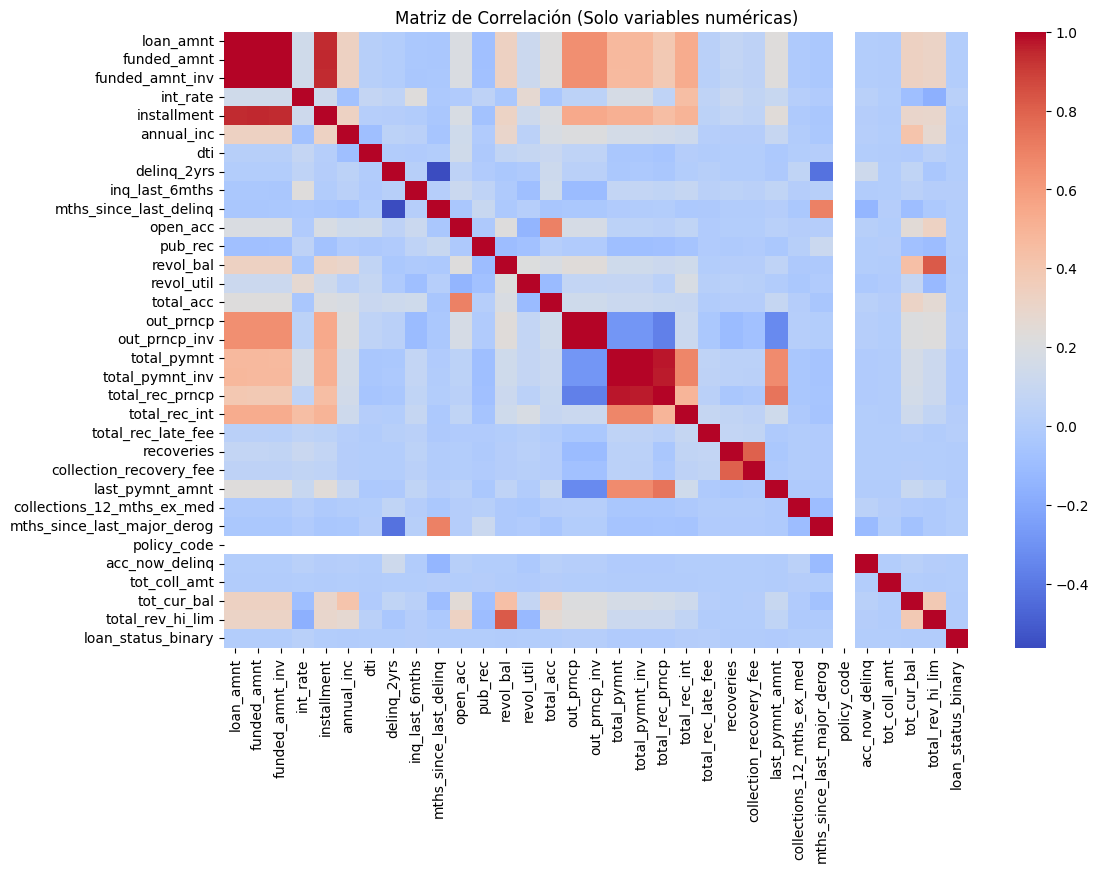

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Gráfico
plt.figure(figsize=(12, 8))
plt.title('Matriz de Correlación (Solo variables numéricas)')
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.show()

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

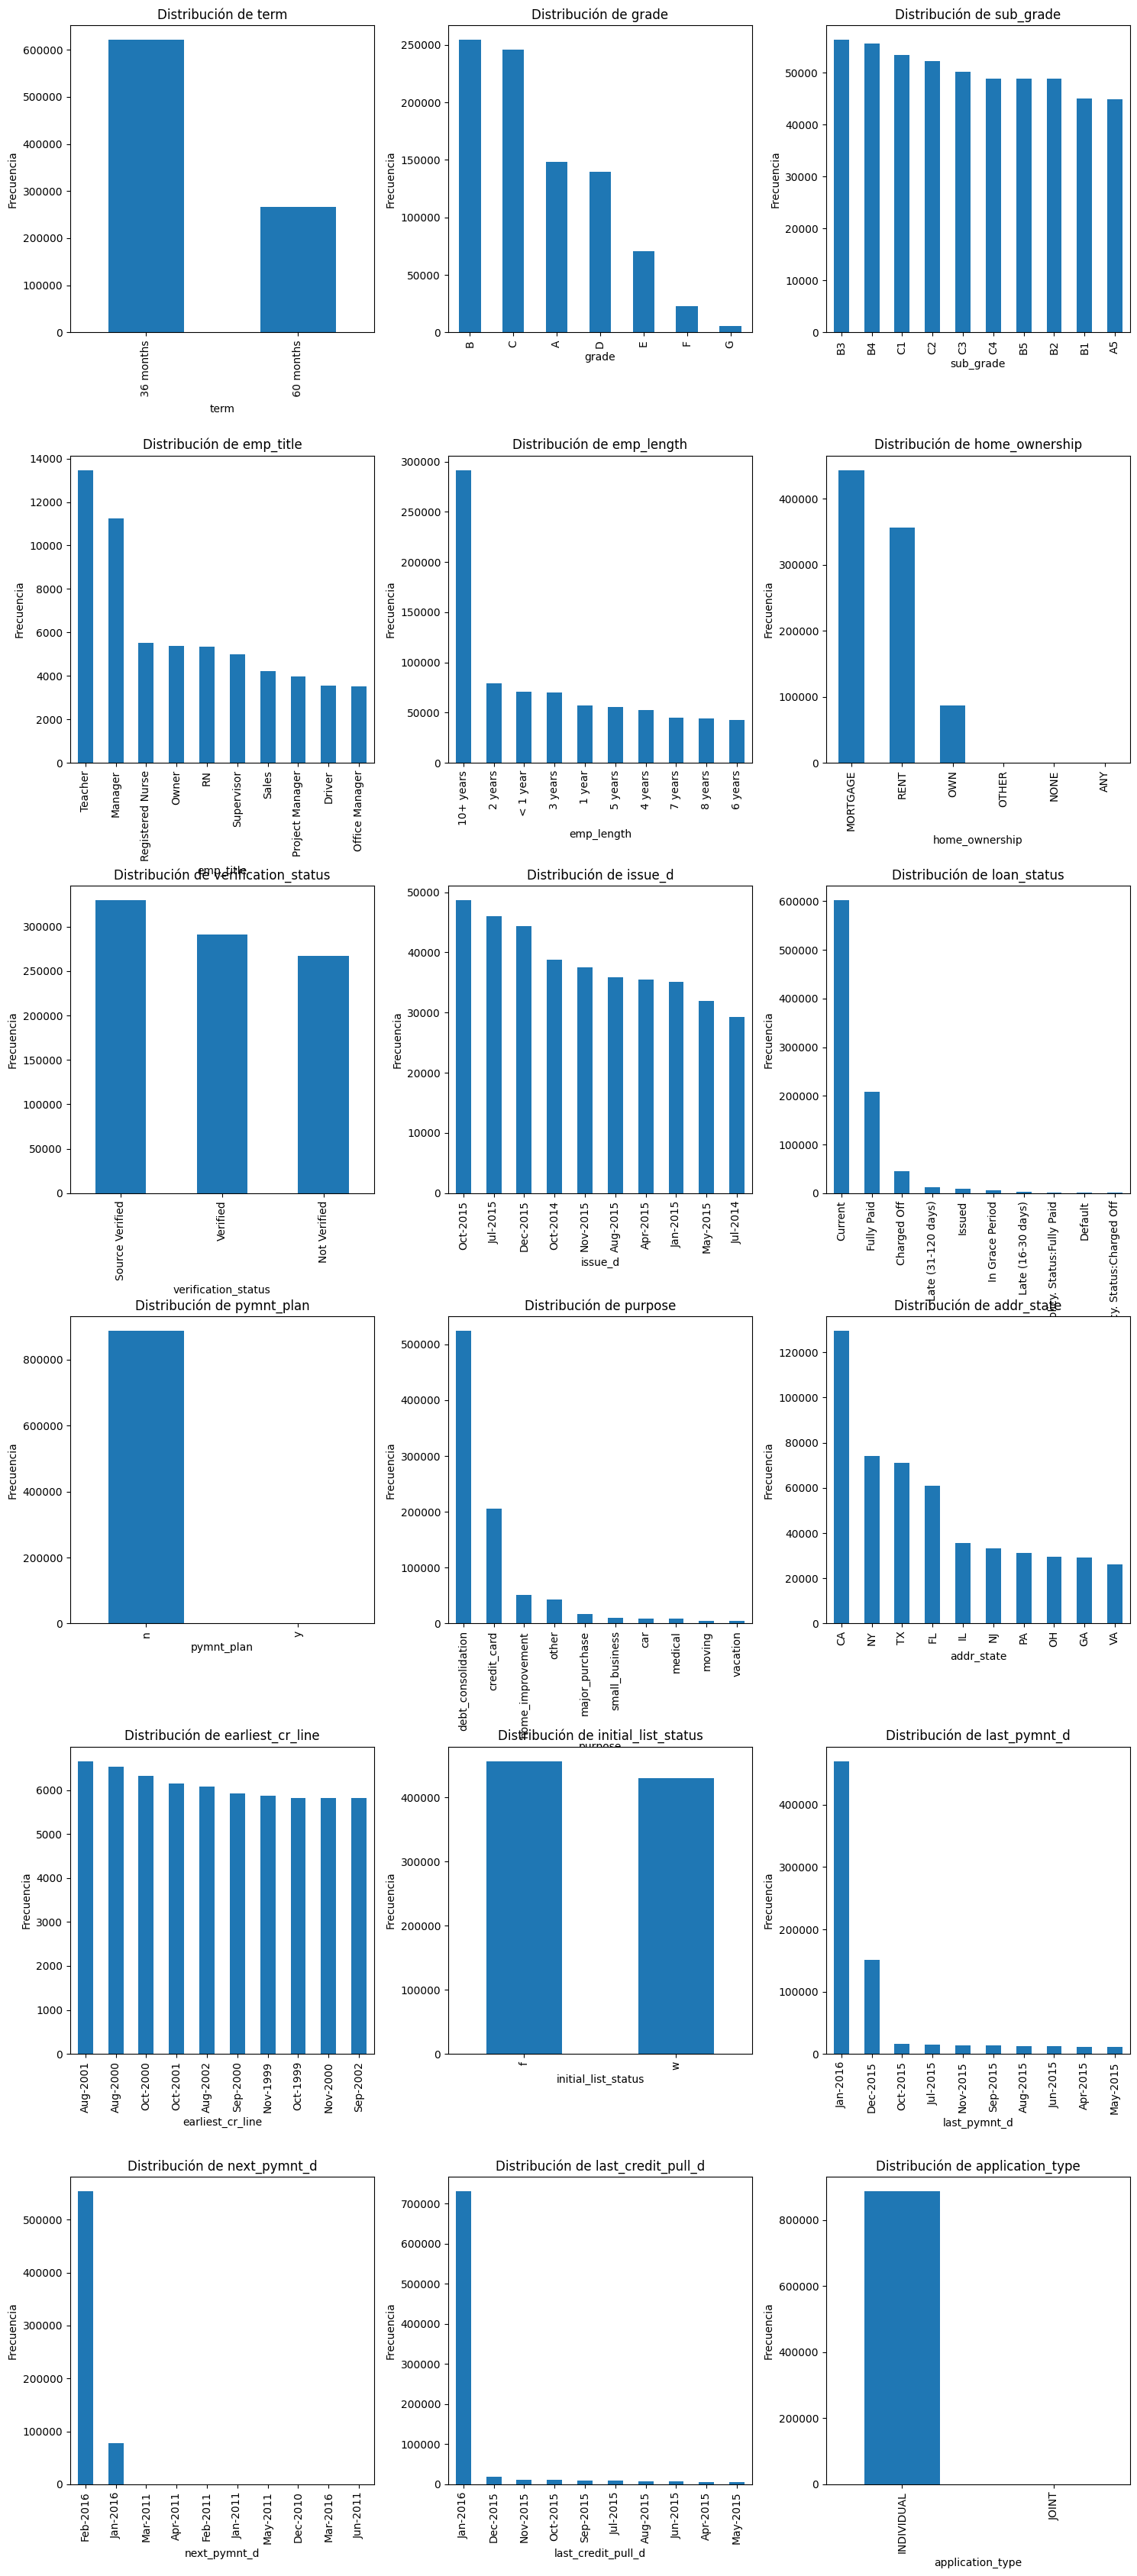

In [16]:
n_cols = 3
n_rows = (len(categorical_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))

for col, ax in zip(categorical_cols, axes.flatten()):
    df[col].value_counts().head(10).plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_ylabel('Frecuencia')

fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.subplots_adjust(hspace=0.4)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_42920\2265656740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['loan_status'], palette='coolwarm')


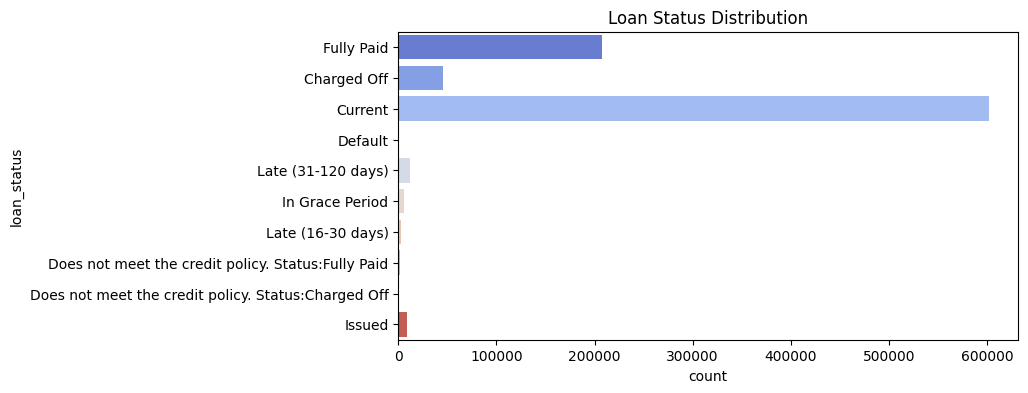

In [17]:
# Plot loan status distribution
plt.figure(figsize=(8, 4))
sns.countplot(y=df['loan_status'], palette='coolwarm')
plt.title("Loan Status Distribution")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_42920\123290108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm', ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_42920\123290108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm', ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_42920\123290108.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, pal

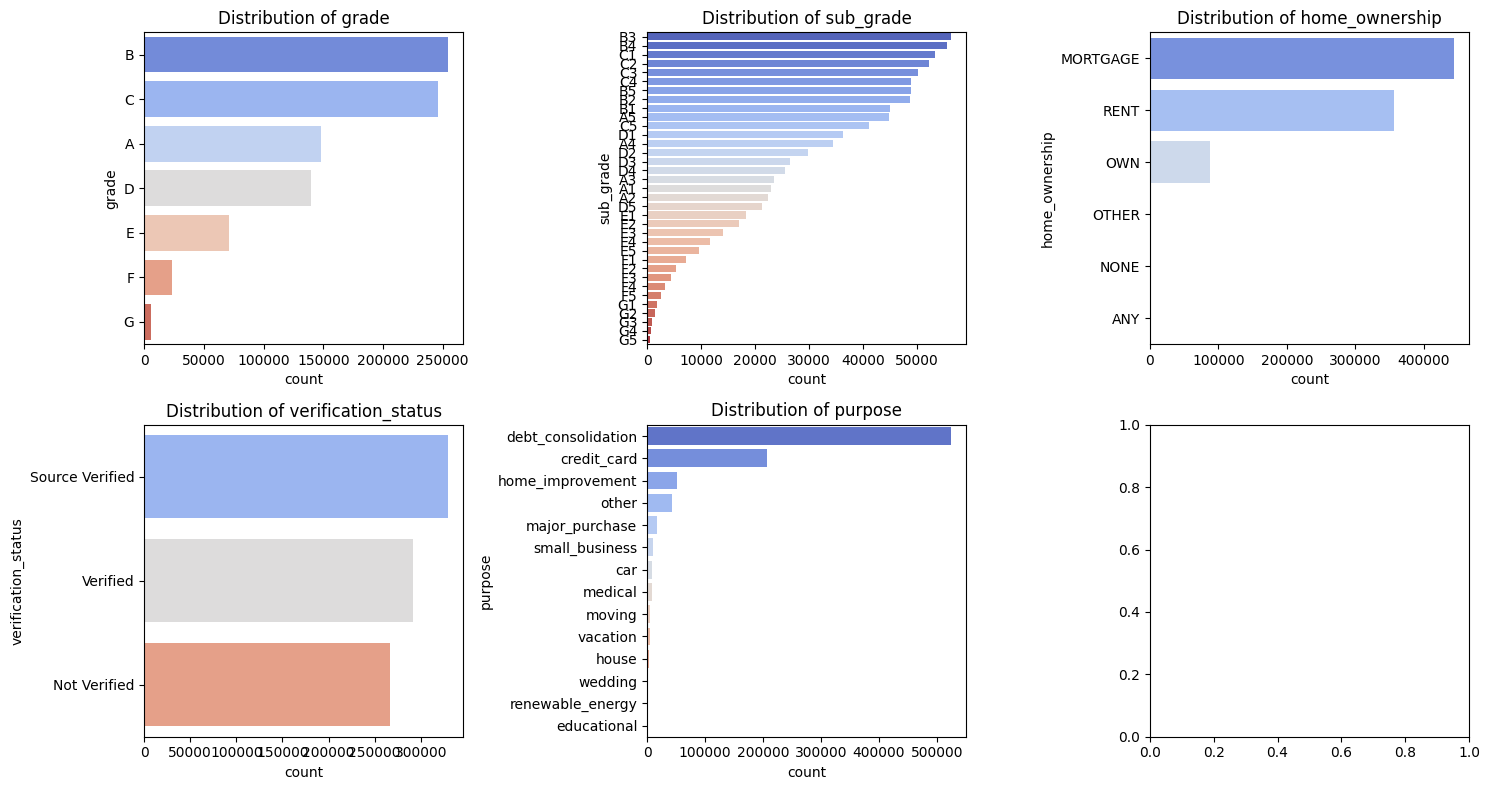

In [18]:
cat_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']

# Plot bar charts for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [19]:
# Print class distribution percentages
print(df['loan_status'].value_counts(normalize=True) * 100)

loan_status
Current                                                67.815330
Fully Paid                                             23.408600
Charged Off                                             5.099061
Late (31-120 days)                                      1.306206
Issued                                                  0.953369
In Grace Period                                         0.704659
Late (16-30 days)                                       0.265614
Does not meet the credit policy. Status:Fully Paid      0.224031
Default                                                 0.137371
Does not meet the credit policy. Status:Charged Off     0.085758
Name: proportion, dtype: float64


In [20]:
# Define loan status categories
loan_status_mapping = {
    'Fully Paid': 0,  # Fully repaid loans
    'In Grace Period': 1,  # Borrowers with minor late payments
    'Late (16-30 days)': 1,  # Short delay
    'Late (31-120 days)': 2,  # Moderate delay
    'Charged Off': 3,  # Officially defaulted
    'Default': 3,  # Severe default case
    'Current': 4,  # Ongoing loan (remove these)
    'Issued': 4,  # New loans (remove these)
    'Does not meet the credit policy. Status:Fully Paid': 5,
    'Does not meet the credit policy. Status:Charged Off': 5,
    
}

# Map the values
df['loan_status'] = df['loan_status'].map(loan_status_mapping)

In [21]:
df = df[df['loan_status'] != 4]
df = df[df['loan_status'] != 5]
print(df['loan_status'].value_counts(normalize=True) * 100)

loan_status
0    75.703285
3    16.934593
2     4.224264
1     3.137858
Name: proportion, dtype: float64


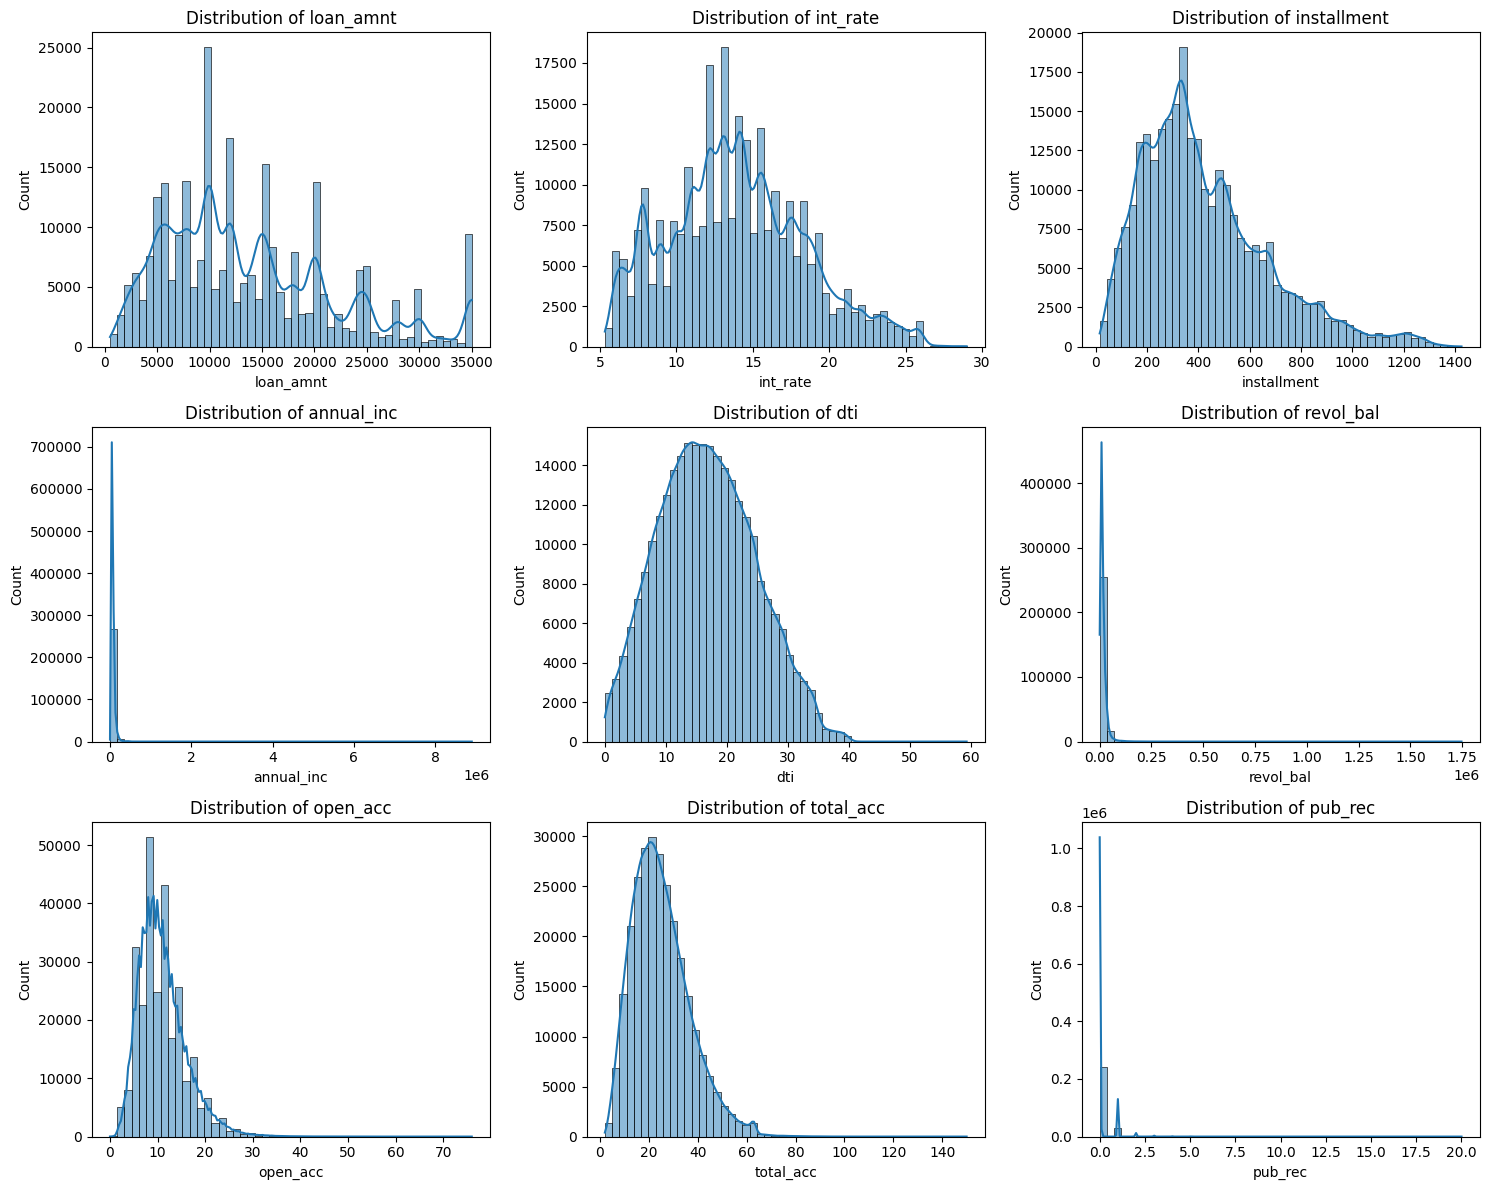

In [22]:
# Select important numerical columns
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'open_acc', 'total_acc', 'pub_rec']

# Plot distributions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

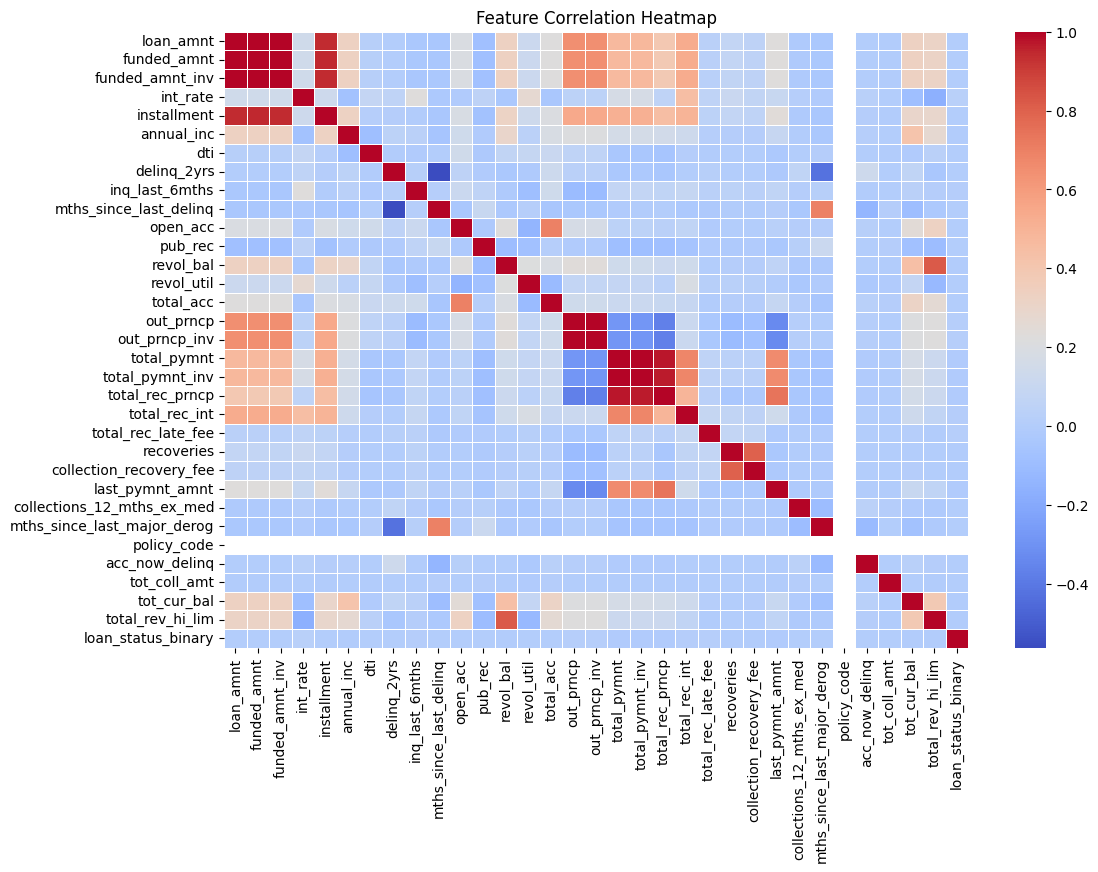

In [23]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

In [25]:
# Select numerical columns to scale
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'open_acc', 'total_acc']

# Apply RobustScaler
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature scaling applied using RobustScaler.")

Feature scaling applied using RobustScaler.


In [26]:
df[num_cols].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,open_acc,total_acc
count,274391.000000,274391.000000,274391.000000,274391.000000,274391.000000,274391.000000,274391.000000,274391.000000
mean,0.151961,0.042104,0.174515,0.249868,0.030497,0.322210,0.167040,0.128507
std,0.719826,0.738794,0.798527,1.442918,0.693646,1.428035,0.822427,0.736034
min,-1.010989,-1.391667,-1.145046,-1.404762,-1.445910,-0.828683,-1.666667,-1.312500
25%,-0.395604,-0.446667,-0.404772,-0.404762,-0.485488,-0.383448,-0.333333,-0.437500
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.604396,0.553333,0.595228,0.595238,0.514512,0.616552,0.666667,0.562500
max,2.021978,2.553333,3.428126,210.430000,3.766051,131.433158,11.000000,7.937500


In [27]:
# Ordinal Encoding for Grade & Sub-Grade
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade'] = df['grade'].map(grade_map)

# Convert sub_grade (A1, A2, B1...) into ordered numbers
df['sub_grade'] = df['sub_grade'].str.extract('(\d+)').astype(float)

# Convert 'term' (e.g., '36 months' → 36)
df['term'] = df['term'].str.extract('(\d+)').astype(int)

# Label Encode Employment Length (e.g., '10+ years' → 10)
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)  # Replace NaNs with median

# One-Hot Encoding for Other Categorical Features
one_hot_cols = ['home_ownership', 'verification_status', 'purpose']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # Drop first to avoid multicollinearity

print("Categorical variables encoded successfully.")

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_42920\630967652.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['sub_grade'] = df['sub_grade'].str.extract('(\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_42920\630967652.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_42920\630967652.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_42920\630967652.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignm

Categorical variables encoded successfully.


In [28]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", non_numeric_cols.tolist())

Categorical Columns: ['emp_title', 'issue_d', 'pymnt_plan', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']


In [29]:
# Drop `emp_title` (Too many unique values, job title isn’t structured well)
df.drop(columns=['emp_title'], inplace=True)

# Convert Date Features into time-based numerical values
date_features = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

# Convert dates to datetime format
for col in date_features:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create new feature: Number of months since earliest credit line
df['credit_age'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 30

# Convert `issue_d` to numerical (Number of months since first issue date)
df['months_since_issue'] = (df['issue_d'] - df['issue_d'].min()).dt.days / 30

# Drop raw date columns
df.drop(columns=date_features, inplace=True)

# Label Encoding for Binary Features
binary_features = ['pymnt_plan', 'initial_list_status', 'application_type']

for col in binary_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-Hot Encoding for `addr_state` (Many unique values)
df = pd.get_dummies(df, columns=['addr_state'], drop_first=True)

print("Remaining categorical variables properly encoded.")

C:\Users\User\AppData\Local\Temp\ipykernel_42920\1499778934.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_42920\1499778934.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_42920\1499778934.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_42920\1499778934.py:9: UserWarning: Could not in

Remaining categorical variables properly encoded.


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 274391 entries, 0 to 887371
Columns: 113 entries, loan_amnt to addr_state_WY
dtypes: bool(70), float64(36), int64(7)
memory usage: 110.4 MB
None


In [31]:
corr_matrix = df.corr() 

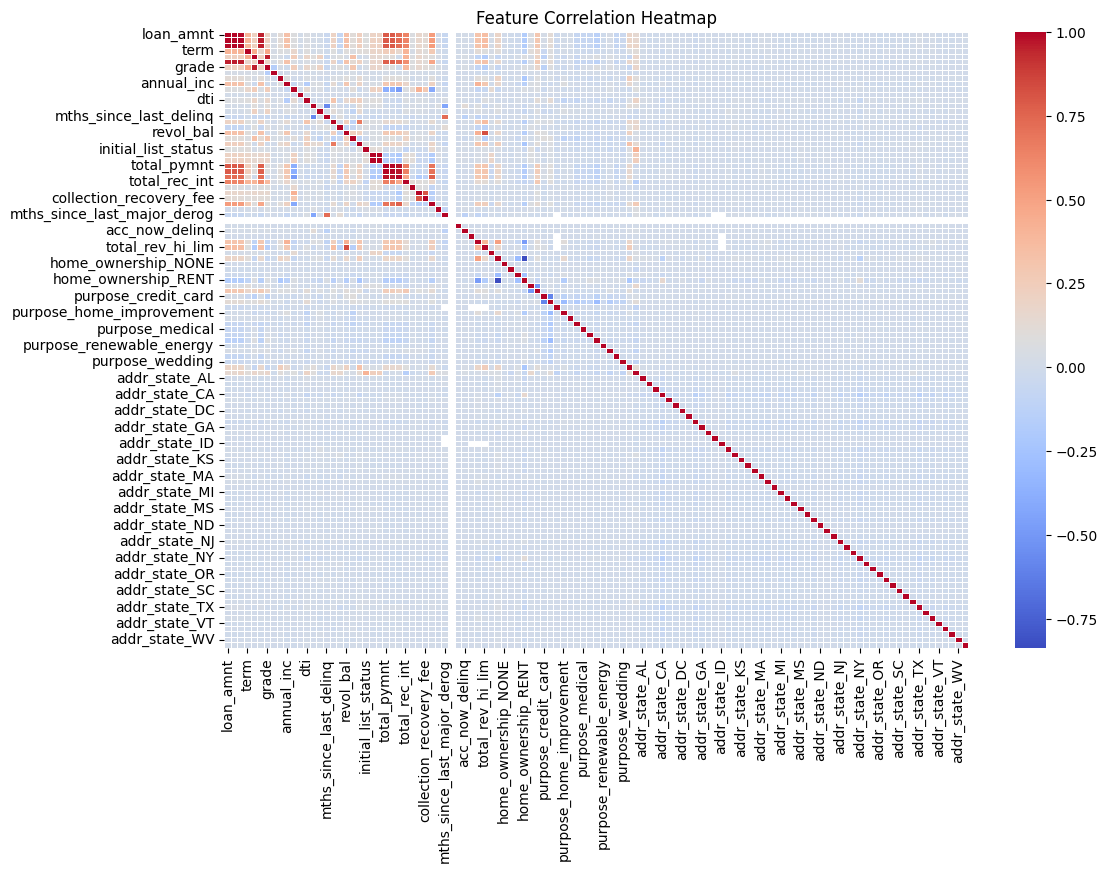

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
print(corr_matrix)

                 loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  \
loan_amnt         1.000000     0.997815         0.992474  0.407503  0.217270   
funded_amnt       0.997815     1.000000         0.995097  0.404142  0.218992   
funded_amnt_inv   0.992474     0.995097         1.000000  0.404923  0.221882   
term              0.407503     0.404142         0.404923  1.000000  0.452465   
int_rate          0.217270     0.218992         0.221882  0.452465  1.000000   
...                    ...          ...              ...       ...       ...   
addr_state_VT    -0.006384    -0.006376        -0.006364 -0.000425 -0.000844   
addr_state_WA     0.000339     0.000680         0.000559 -0.004962  0.001923   
addr_state_WI    -0.005736    -0.005657        -0.005625  0.002144 -0.003109   
addr_state_WV    -0.000976    -0.000761        -0.000292  0.006452 -0.002017   
addr_state_WY     0.007275     0.007371         0.007628  0.001640  0.000799   

                 installment     grade 

# Model Implementations (binary target)

### Imports and Train/Test Split

In [34]:
!pip install shap
!pip install numpy==1.26.4


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier,  plot_tree
from xgboost import plot_importance
import shap


In [36]:

X = df.drop(columns=['loan_status', 'loan_status_binary']).fillna(df.median())
Y = df['loan_status_binary']

# División entrenamiento-prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


### Logistic Regression

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
Y_pred = logreg.predict(X_test_scaled)
Y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
print("\nReporte de Clasificación:")
print(classification_report(Y_test, Y_pred))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81952
           1       0.00      0.00      0.00       366

    accuracy                           1.00     82318
   macro avg       0.50      0.50      0.50     82318
weighted avg       0.99      1.00      0.99     82318



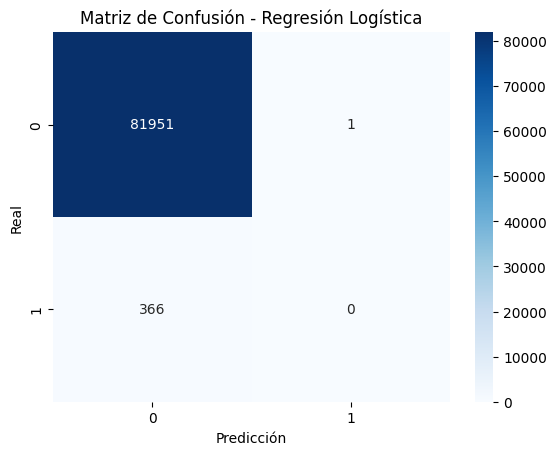

In [40]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [41]:
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.954


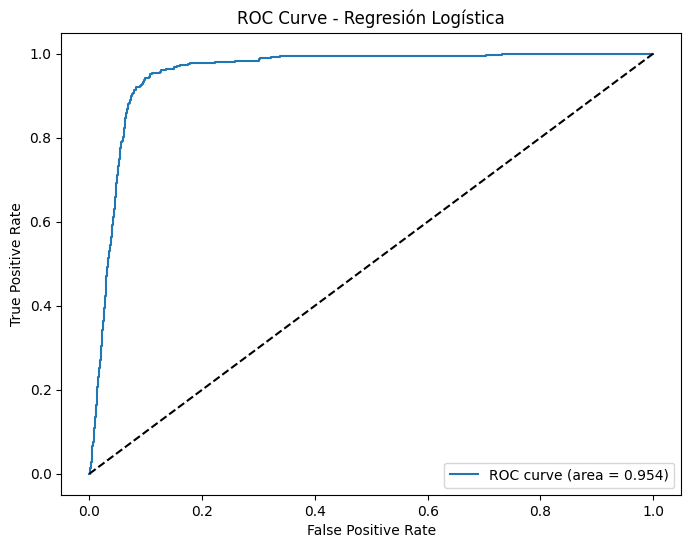

In [42]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

### XGBoost (binary)


In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(Y_train)-sum(Y_train))/sum(Y_train), random_state=42)
xgb.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:14:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
Y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [45]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo determinado por ROC: {optimal_threshold:.3f}")


Umbral óptimo determinado por ROC: 0.002


In [46]:
Y_pred_optimal = (Y_pred_proba >= optimal_threshold).astype(int)
accuracy = accuracy_score(Y_test, Y_pred_optimal)
print(f"\nAccuracy del modelo: {accuracy:.3f}")
print("\nReporte de Clasificación (Umbral óptimo):")
print(classification_report(Y_test, Y_pred_optimal))



Accuracy del modelo: 0.956

Reporte de Clasificación (Umbral óptimo):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81952
           1       0.09      0.97      0.17       366

    accuracy                           0.96     82318
   macro avg       0.55      0.96      0.57     82318
weighted avg       1.00      0.96      0.97     82318



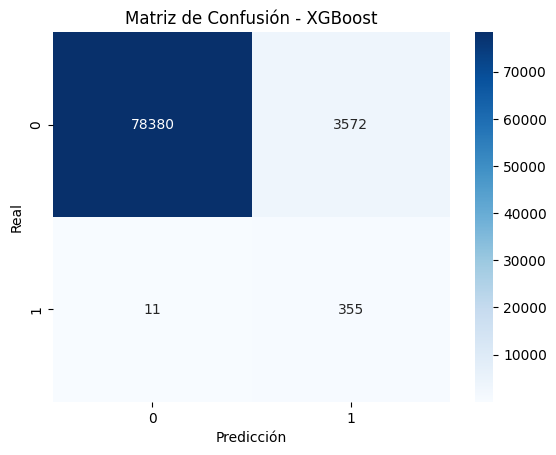

In [47]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_optimal), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [48]:
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.986


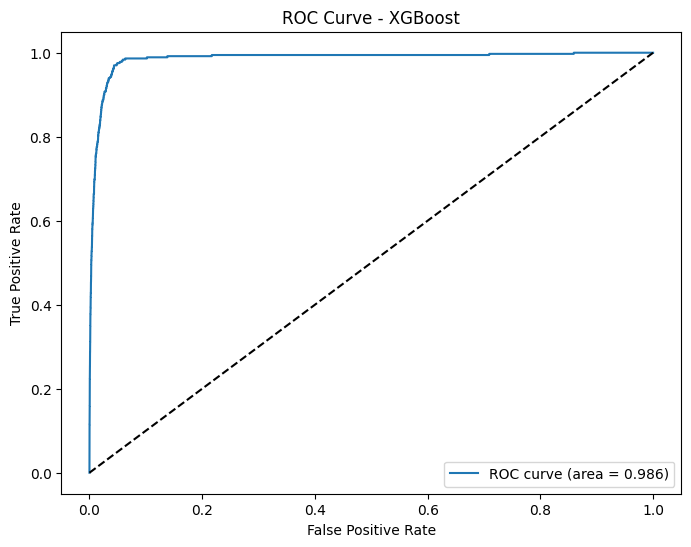

In [49]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()


Feature Importance usando SHAP:


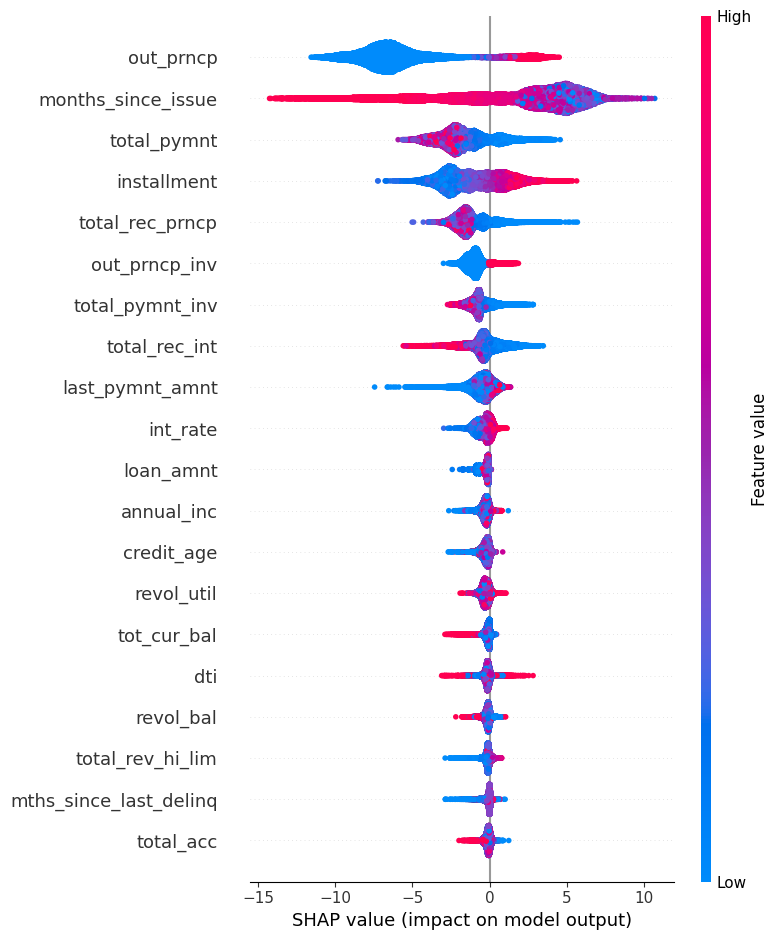

In [50]:
# Feature importance con SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

print("\nFeature Importance usando SHAP:")
shap.summary_plot(shap_values, X_test)

# Model Implementations (non-binary target)

### Train/Test Split

In [51]:
from xgboost import plot_importance

In [52]:
X = df.drop(columns=['loan_status', 'loan_status_binary']).fillna(df.median())
Y = df['loan_status']

# División entrenamiento-prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

## XGBoost 

In [53]:
xgb_multi = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', random_state=42)
xgb_multi.fit(X_train, Y_train)
Y_pred = xgb_multi.predict(X_test)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:15:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [54]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy del modelo multiclase: {accuracy:.3f}")


Accuracy del modelo multiclase: 0.980


In [55]:
print("\nReporte de Clasificación Multiclase:")
print(classification_report(Y_test, Y_pred))


Reporte de Clasificación Multiclase:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62318
           1       0.79      0.74      0.76      2583
           2       0.75      0.84      0.79      3477
           3       1.00      0.97      0.98     13940

    accuracy                           0.98     82318
   macro avg       0.88      0.89      0.89     82318
weighted avg       0.98      0.98      0.98     82318



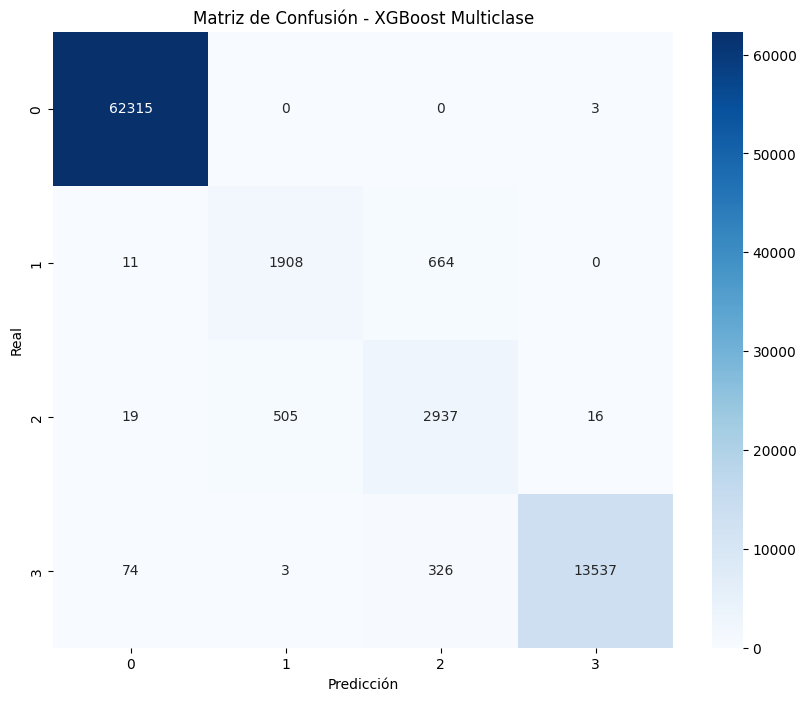

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost Multiclase')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


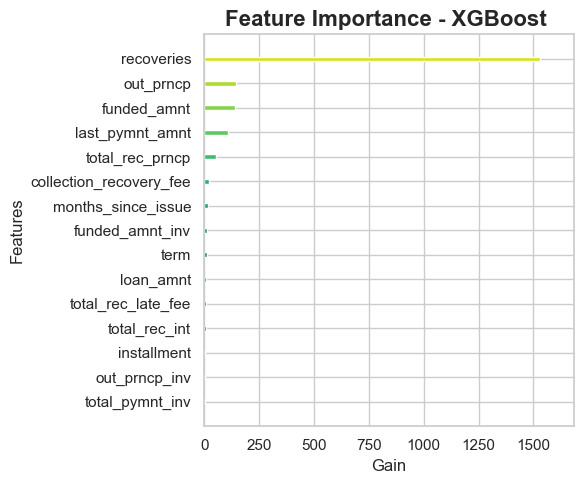

In [62]:
sns.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(6, 5))


plot_importance(
    xgb_multi,
    max_num_features=15,
    importance_type='gain',
    ax=ax,
    show_values=False,  
    color=sns.color_palette("viridis", 15)  
)


ax.set_title("Feature Importance - XGBoost ", fontsize=16, fontweight='bold')
ax.set_xlabel("Gain", fontsize=12)
ax.set_ylabel("Features", fontsize=12)


plt.tight_layout()
plt.show()
